# EfficientNetV1-B0用

In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.lines import Line2D
import numpy as np
import seaborn as sns

from PIL import Image

%matplotlib inline

def combined_graph_plt(weight_input, activation_input, param1, param2, save=False):
    """
    activation_input: list of activation bit
    weight_input: list of weight bit
    param1, param2: parameters for the model (lambda)
    """
    # act_bit = [2, 3, 4]
    act_bit = [2, 4, 6, 8]
    # for idx, info in enumerate(activation_input):
    #     activation_input[idx] = -act_bit[info]
    activation_input = [-x for x in activation_input]
    # weight_bit = [1, 2, 3, 4]
    weight_bit = [2, 4, 6, 8]
    # for idx, info in enumerate(weight_input):
    #     weight_input[idx] = weight_bit[info]
    weight_input = weight_input
    fig, ax = plt.subplots(figsize=(20, 3))  # Adjust the size of the graph

    # Define bar colors and labels for the legend
    bar_colors = [(201/255, 218/255, 248/255), (197/255, 123/255, 112/255)]  # reversed colors
    bar_labels = ["#weight bit", "#activation bit"]  # Change the labels
    handles = [patches.Rectangle((0,0),1,1, facecolor=bar_colors[i], edgecolor='none') for i in range(len(bar_labels))]  # Set edgecolor to 'none'

    ax.set_ylim(-8.5, 8.5)  # Set y-axis limit from -8.5 to 8.5

    for idx in range(len(weight_input)):
        # Assign colors for each bar
        bar_color_weight = bar_colors[0]
        bar_color_activation = bar_colors[1]

        ax.bar(idx + 1 + 0.01, weight_input[idx], color=bar_color_weight, zorder=2, edgecolor='none')  # Set edgecolor to 'none'
        ax.bar(idx + 1 + 0.01, activation_input[idx], color=bar_color_activation, zorder=2, edgecolor='none')  # Set edgecolor to 'none'

    # Set y-ticks and labels
    y_ticks = np.arange(-8, 9, 2)  # Create a range from -8 to 8 with a step of 2
    ax.set_yticks(list(y_ticks))
    ax.set_yticklabels([abs(tick) for tick in ax.get_yticks()], fontsize=14)  # Increase font size to 14

    # Set y-label
    ax.set_ylabel('#Bit', fontsize=18)  # Change y-label to "#Bit" and set font size to 14

    # Adjust x-axis limit
    ax.set_xlim(0.5, len(weight_input) + 3.5)  # Adjust left x limit to 0.5

    # Add horizontal dashed lines at the top and bottom
    ax.hlines(8, xmin=0.5, xmax=len(weight_input)+3.5, color='gray', linestyle='--', linewidth=1.0, zorder=1)  # Adjust left x limit to 0.5
    ax.hlines(-8, xmin=0.5, xmax=len(weight_input)+3.5, color='gray', linestyle='--', linewidth=1.0, zorder=1)  # Adjust left x limit to 0.5

    # Add horizontal dashed lines for the rest
    for y in y_ticks:
        if y != 0 and y != 8 and y != -8:
            ax.hlines(y, xmin=0.5, xmax=len(weight_input)+3.5, color='gray', linestyle='--', linewidth=1.0, zorder=1)  # Adjust left x limit to 0.5

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(2)  # Make x-axis line visible and thicker
    ax.spines['bottom'].set_position(('data', 0))  # Move x-axis to y=0
    ax.spines['left'].set_linewidth(2)  # Make y-axis line visible and thicker
    ax.spines['left'].set_position(('data', 0.5))  # Move y-axis to match arrow start

    ax.tick_params(axis='both', labelsize=16, width=2)  # Increase label size to 14

    # move x-axis label to top
    ax.xaxis.set_label_position('top')

    # Add x-ticks at the end of the arrow
    x_ticks = [1] + list(range(10, len(activation_input)+2, 10))
    ax.set_xticks(x_ticks)
    ax.set_xticklabels([])  # Add this line to remove automatically generated labels

    # Add x-tick labels at the position of the bars
    x_tick_labels = [ax.text(tick, -0.7, str(tick), ha='center', va='top', fontsize=16, zorder=5) for tick in x_ticks]  # Increase font size to 14

    # Manually draw tick lines
    for tick in x_ticks:
        ax.add_line(Line2D([tick, tick], [-0.4, 0], color='black', linewidth=2, zorder=3))  # Change zorder to 3

    # Move x-axis label to the arrow end
    ax.text(len(weight_input) + 4.7, -1.2, 'Layer', fontsize=18, ha='right', va='center')  # Change label to "Layer" and add at the right end, slightly below x-axis

    fig.legend(handles, bar_labels, loc='lower center', fontsize='20', ncol=len(bar_labels), borderaxespad=0.0, borderpad=0.8, handlelength=0.8, handletextpad=0.3, edgecolor='black', frameon=False, bbox_to_anchor=(0.5, -0.1))  # Move legend closer to the plot

    if save:
        # Save the graph as an image file
        filepath = f'/EdMIPS/graphs/B0_bit_lambda{param1}_{param2}.svg'
        # filepath = f'/EdMIPS/graphs/B0_bit_EdMIPS.svg'
        fig.savefig(filepath, bbox_inches='tight')

    # Display the graph
    plt.show()



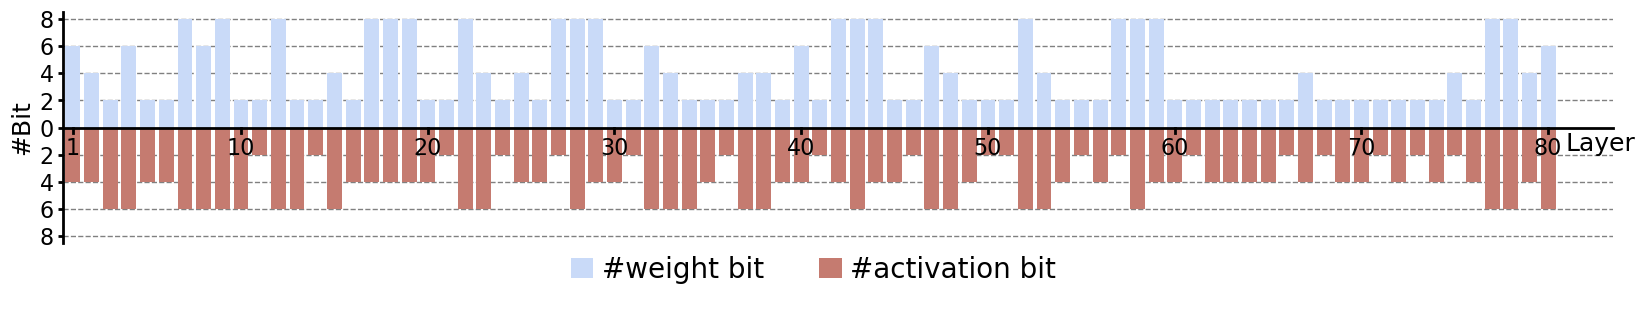

In [2]:
# input_act =    [4, 6, 6, 6, 2, 4, 6, 2, 4, 2, 2, 6, 4, 2, 2, 4, 4, 4, 4, 2, 2, 2, 6, 6, 2, 4, 6, 6, 4, 4, 2, 6, 6, 4, 4, 2, 6, 6, 4, 4, 2, 4, 6, 4, 2, 2, 4, 6, 4, 2, 2, 6, 6, 4, 2, 4, 2, 6, 4, 2, 2, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 4, 2, 6, 4, 4]
# input_weight =  [6, 8, 8, 6, 2, 2, 6, 4, 8, 2, 2, 6, 2, 2, 4, 2, 8, 8, 8, 2, 2, 8, 8, 2, 4, 2, 8, 8, 8, 2, 2, 6, 2, 2, 2, 2, 4, 4, 2, 6, 2, 8, 8, 8, 2, 2, 8, 4, 2, 2, 2, 6, 4, 2, 4, 2, 8, 8, 8, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 2, 8, 8, 4, 6]
input_act =[4, 4, 6, 6, 4, 4, 6, 6, 6, 6, 2, 6, 6, 2, 6, 4, 4, 4, 4, 4, 2, 6, 6, 2, 4, 4, 2, 6, 4, 4, 2, 6, 6, 6, 4, 2, 6, 6, 4, 4, 2, 4, 6, 4, 4, 2, 6, 6, 4, 2, 2, 6, 6, 4, 2, 4, 2, 6, 4, 4, 2, 4, 4, 4, 4, 2, 4, 2, 4, 4, 2, 4, 2, 4, 2, 4, 6, 6, 4, 6]
input_weight = [6, 4, 2, 6, 2, 2, 8, 6, 8, 2, 2, 8, 2, 2, 4, 2, 8, 8, 8, 2, 2, 8, 4, 2, 4, 2, 8, 8, 8, 2, 2, 6, 4, 2, 2, 2, 4, 4, 2, 6, 2, 8, 8, 8, 2, 2, 6, 4, 2, 2, 2, 8, 4, 2, 2, 2, 8, 8, 8, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 8, 8, 4, 6]
param1 = "10e-04"
param2 = "0.1"
# combined_graph_plt(input_weight, input_act, param1, param2, save=False)
combined_graph_plt(input_weight, input_act, param1, param2, save=False)

# EfficientNetV1-B3用

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.lines import Line2D
import numpy as np

def combined_graph_plt(weight_input, activation_input, param1, param2, save=False):
    """
    activation_input: list of activation bit
    weight_input: list of weight bit
    param1, param2: parameters for the model (lambda)
    """
    # act_bit = [2, 3, 4]
    act_bit = [2, 4, 6, 8]
    # for idx, info in enumerate(activation_input):
    #     activation_input[idx] = -act_bit[info]
    activation_input = [-x for x in activation_input]
    # weight_bit = [1, 2, 3, 4]
    weight_bit = [2, 4, 6, 8]
    # for idx, info in enumerate(weight_input):
    #     weight_input[idx] = weight_bit[info]
    weight_input = weight_input
    fig, ax = plt.subplots(figsize=(30, 5))  # Adjust the size of the graph

    # Define bar colors and labels for the legend
    bar_colors = [(201/255, 218/255, 248/255), (197/255, 123/255, 112/255)]  # reversed colors
    bar_labels = ["#weight bit", "#activation bit"]  # Change the labels
    handles = [patches.Rectangle((0,0),1,1, facecolor=bar_colors[i], edgecolor='none') for i in range(len(bar_labels))]  # Set edgecolor to 'none'

    ax.set_ylim(-8.5, 8.5)  # Set y-axis limit from -8.5 to 8.5

    for idx in range(len(weight_input)):
        # Assign colors for each bar
        bar_color_weight = bar_colors[0]
        bar_color_activation = bar_colors[1]

        ax.bar(idx + 1 + 0.01, weight_input[idx], color=bar_color_weight, zorder=2, edgecolor='none')  # Set edgecolor to 'none'
        ax.bar(idx + 1 + 0.01, activation_input[idx], color=bar_color_activation, zorder=2, edgecolor='none')  # Set edgecolor to 'none'

    # Set y-ticks and labels
    y_ticks = np.arange(-8, 9, 2)  # Create a range from -8 to 8 with a step of 2
    ax.set_yticks(list(y_ticks))
    ax.set_yticklabels([abs(tick) for tick in ax.get_yticks()], fontsize=14)  # Increase font size to 14

    # Set y-label
    ax.set_ylabel('#Bit', fontsize=18)  # Change y-label to "#Bit" and set font size to 14

    # Adjust x-axis limit
    ax.set_xlim(0.5, len(weight_input) + 3.5)  # Adjust left x limit to 0.5

    # Add horizontal dashed lines at the top and bottom
    ax.hlines(8, xmin=0.5, xmax=len(weight_input)+3.5, color='gray', linestyle='--', linewidth=1.0, zorder=1)  # Adjust left x limit to 0.5
    ax.hlines(-8, xmin=0.5, xmax=len(weight_input)+3.5, color='gray', linestyle='--', linewidth=1.0, zorder=1)  # Adjust left x limit to 0.5

    # Add horizontal dashed lines for the rest
    for y in y_ticks:
        if y != 0 and y != 8 and y != -8:
            ax.hlines(y, xmin=0.5, xmax=len(weight_input)+3.5, color='gray', linestyle='--', linewidth=1.0, zorder=1)  # Adjust left x limit to 0.5

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(2)  # Make x-axis line visible and thicker
    ax.spines['bottom'].set_position(('data', 0))  # Move x-axis to y=0
    ax.spines['left'].set_linewidth(2)  # Make y-axis line visible and thicker
    ax.spines['left'].set_position(('data', 0.5))  # Move y-axis to match arrow start

    ax.tick_params(axis='both', labelsize=16, width=2)  # Increase label size to 14

    # move x-axis label to top
    ax.xaxis.set_label_position('top')

    # Add x-ticks at the end of the arrow
    x_ticks = [1] + list(range(10, len(activation_input)+2, 10))
    ax.set_xticks(x_ticks)
    ax.set_xticklabels([])  # Add this line to remove automatically generated labels

    # Add x-tick labels at the position of the bars
    x_tick_labels = [ax.text(tick, -0.7, str(tick), ha='center', va='top', fontsize=16, zorder=5) for tick in x_ticks]  # Increase font size to 14

    # Manually draw tick lines
    for tick in x_ticks:
        ax.add_line(Line2D([tick, tick], [-0.4, 0], color='black', linewidth=2, zorder=3))  # Change zorder to 3

    # Move x-axis label to the arrow end
    # ax.text(len(weight_input) + 4.7, -1.2, 'Layer', fontsize=18, ha='right', va='center')  # Change label to "Layer" and add at the right end, slightly below x-axis

    fig.legend(handles, bar_labels, loc='lower center', fontsize='20', ncol=len(bar_labels), borderaxespad=0.0, borderpad=0.8, handlelength=0.8, handletextpad=0.3, edgecolor='black', frameon=False, bbox_to_anchor=(0.5, -0.1))  # Move legend closer to the plot

    if save:
        # Save the graph as an image file
        filepath = f'/EdMIPS/graphs/B3_bit_lambda{param1}_{param2}.svg'
        # filepath = f'/EdMIPS/graphs/B3_bit_EdMIPS.svg'
        fig.savefig(filepath, bbox_inches='tight')

    # Display the graph
    plt.show()




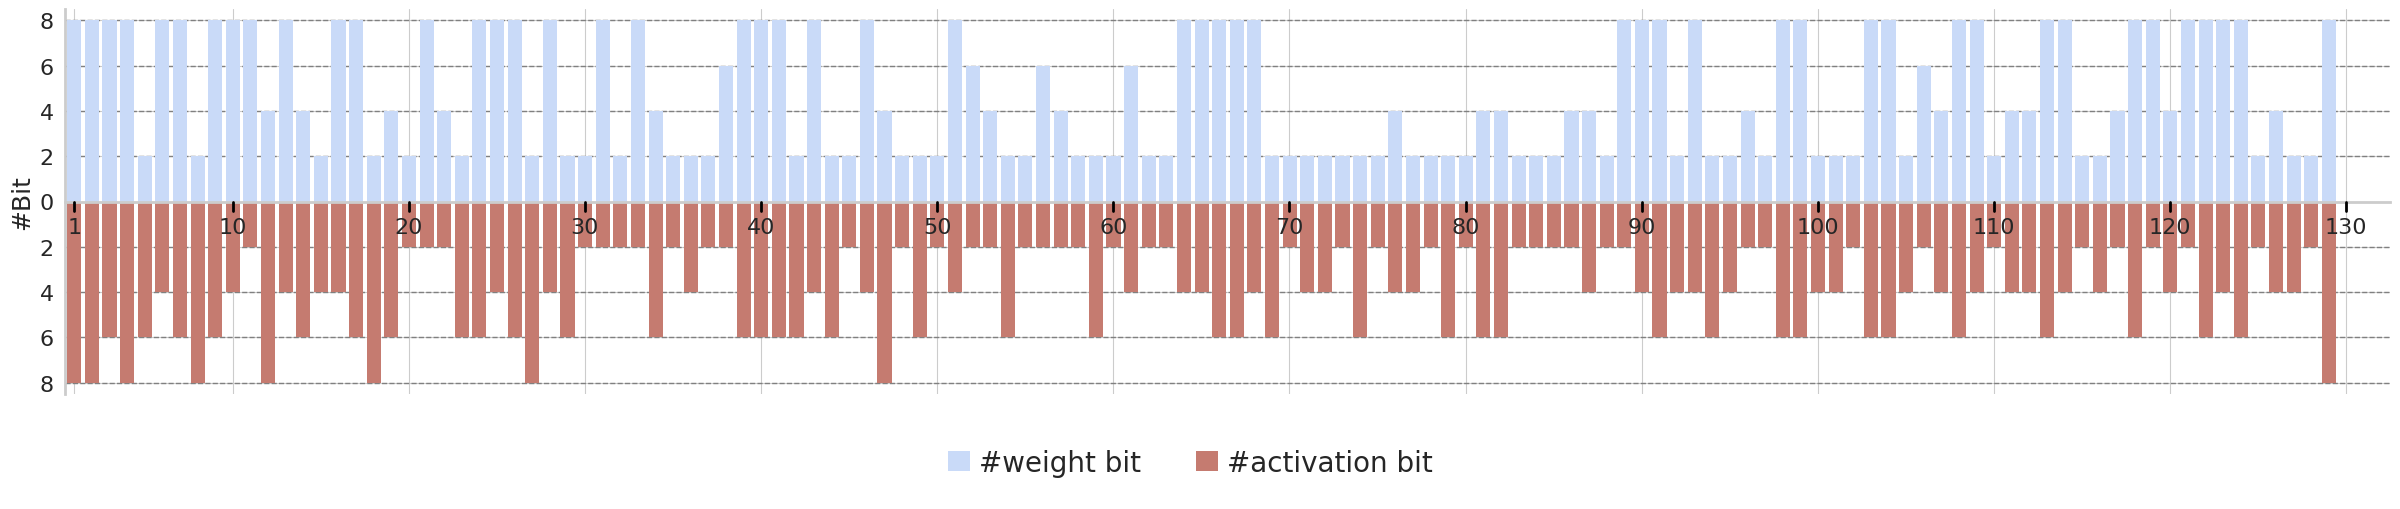

In [ ]:
# input_act =    [8, 8, 6, 8, 6, 4, 6, 8, 6, 4, 2, 8, 4, 6, 4, 4, 6, 8, 6, 2, 2, 2, 6, 6, 4, 6, 8, 4, 6, 2, 2, 2, 2, 6, 2, 4, 2, 2, 6, 6, 6, 6, 4, 6, 2, 4, 8, 2, 6, 2, 4, 2, 2, 6, 2, 2, 2, 2, 6, 2, 4, 2, 2, 4, 4, 6, 6, 4, 6, 2, 4, 4, 2, 6, 2, 4, 4, 2, 6, 2, 6, 6, 2, 2, 2, 2, 4, 2, 2, 4, 6, 4, 4, 6, 4, 2, 2, 6, 6, 4, 4, 2, 6, 6, 4, 2, 4, 6, 4, 2, 4, 4, 6, 4, 2, 4, 2, 6, 2, 4, 2, 6, 4, 6, 2, 4, 4, 2, 8]
# input_weight =  [8, 8, 8, 8, 2, 8, 8, 2, 8, 8, 8, 4, 8, 4, 2, 8, 8, 2, 4, 2, 8, 4, 2, 8, 8, 8, 2, 8, 2, 2, 8, 2, 8, 4, 2, 2, 2, 6, 8, 8, 8, 2, 8, 2, 2, 8, 4, 2, 2, 2, 8, 6, 4, 2, 2, 6, 4, 2, 2, 2, 6, 2, 2, 8, 8, 8, 8, 8, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 4, 4, 2, 8, 8, 8, 2, 8, 2, 2, 4, 2, 8, 8, 2, 2, 2, 8, 8, 2, 6, 4, 8, 8, 2, 4, 4, 8, 8, 2, 2, 4, 8, 8, 4, 8, 8, 8, 8, 2, 4, 2, 2, 8]

param1 = "10e-04"
param2 = "0.001"
# combined_graph_plt(input_weight, input_act, param1, param2, save=False)
combined_graph_plt(input_weight, input_act, param1, param2, save=True)

# Acc vs gainのグラフ

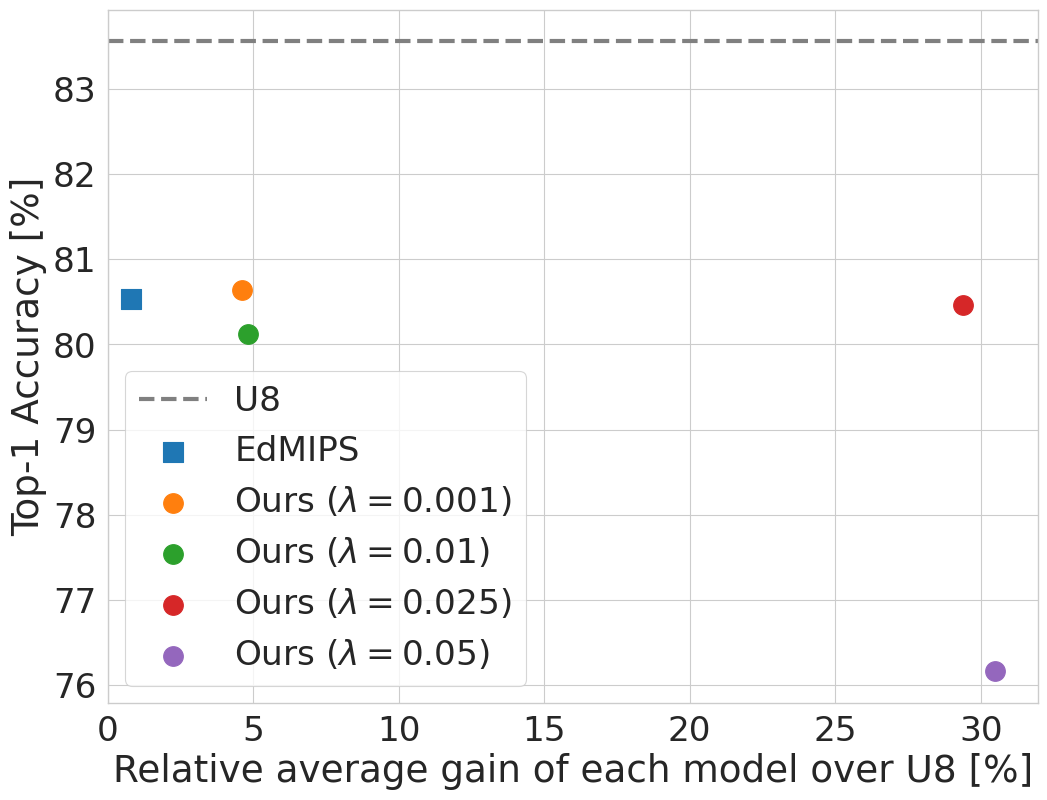

'/EdMIPS/graphs/B3_accuracy_vs_gain.svg'

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Update style parameters for publication-quality graphs
sns.set_context("paper", font_scale=2.8)  # Adjust the context parameters to suit a paper
sns.set_style("whitegrid", {'axes.grid': True})  # Create a white background and enable grid

# EfficientNetV1-B0
# data = {
#     'U8': [82.88, 0],
#     'EdMIPS': [80.80, 5.54],
#     r'Ours ($\lambda = 0.001$)': [80.26, 14.3],
#     r'Ours ($\lambda = 0.01$)': [79.88, 26.17],
#     r'Ours ($\lambda = 0.1$)': [78.44, 27.92],
#     r'Ours ($\lambda = 0.5$)': [78.14, 29.14],


# }

# EfficientNetV1-B3
data = {
    'U8': [83.56, 0],
    'EdMIPS': [80.54, 0.81],
    r'Ours ($\lambda = 0.001$)': [80.64, 4.60],
    r'Ours ($\lambda = 0.01$)': [80.12, 4.83],
    r'Ours ($\lambda = 0.025$)': [80.46, 29.38],
    r'Ours ($\lambda = 0.05$)': [76.16, 30.48],
}


# Create a new figure
fig, ax = plt.subplots(figsize=(12, 9))

# Plot data
for model in data.keys():
    if model != 'U8':
        if 'Ours' in model:
            marker = 'o'  # Circle marker for 'Ours'
        elif 'EdMIPS' in model:
            marker = 's'  # Square marker for 'EdMIPS'
        
        plt.scatter(data[model][1], data[model][0], label=model, marker=marker, s=200)  # Increased marker size

# Add a horizontal dashed line at U8's Top-1 Accuracy with a label
plt.axhline(y=data['U8'][0], color='gray', linestyle='--', label='U8', linewidth=3.0)

# Set x and y labels
ax.set_xlabel('Relative average gain of each model over U8 [%]')
ax.set_ylabel('Top-1 Accuracy [%]')

# Set x-axis limit to start at 0
ax.set_xlim(left=0)

# Add a legend with 'U8' at the top
handles, labels = ax.get_legend_handles_labels()
order = [labels.index('U8')] + [i for i in range(len(labels)) if labels[i] != 'U8']
ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order])

# Save the figure in SVG format
filepath = f'/EdMIPS/graphs/B3_accuracy_vs_gain.svg'
plt.savefig(filepath, format='svg')

# Show the plot
plt.show()

